# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate

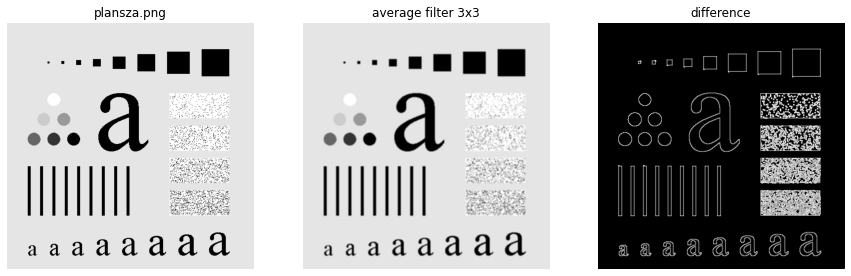

In [2]:
I = cv2.imread('plansza.png')

kernel = np.ones((3, 3))/9
_I = cv2.filter2D(I, -1, kernel)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(I), ax[0].set_title('plansza.png')
ax[1].imshow(_I), ax[1].set_title('average filter 3x3')
ax[2].imshow(abs(_I-I)), ax[2].set_title('difference')
for i in range(3):
    ax[i].axis('off')
plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

In [3]:
def image_from_filter(image, size):
    kernel = np.ones((size, size))/(size*size)
    return cv2.filter2D(image, -1, kernel)

def filter_average_show(image: str):
    I = cv2.imread(image)
    I3 = image_from_filter(I, 3)
    I5 = image_from_filter(I, 5)
    I9 = image_from_filter(I, 9)
    I15 = image_from_filter(I, 15)
    I35 = image_from_filter(I, 35)

    fig, ax = plt.subplots(1, 6, figsize=(15, 2.5))
    for i in range(6):
        ax[i].axis('off')

    ax[0].imshow(I), ax[0].set_title(image)
    ax[1].imshow(I3), ax[1].set_title('average filter 3x3')
    ax[2].imshow(I5), ax[2].set_title('average filter 5x5')
    ax[3].imshow(I9), ax[3].set_title('average filter 9x9')
    ax[4].imshow(I15), ax[4].set_title('average filter 15x15')
    ax[5].imshow(I35), ax[5].set_title('average filter 35x35')

    plt.show()

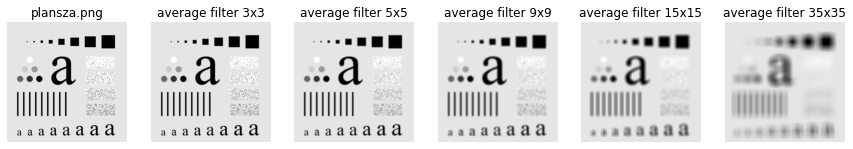

In [4]:
filter_average_show('plansza.png')

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

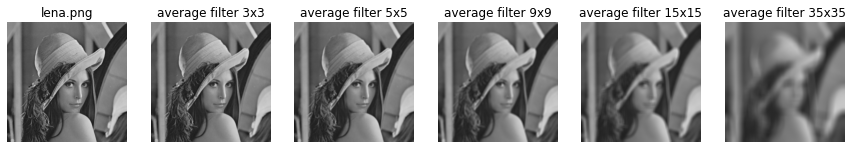

In [5]:
filter_average_show('lena.png')

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

Mask:
[[1 2 1]
 [2 4 2]
 [1 2 1]]


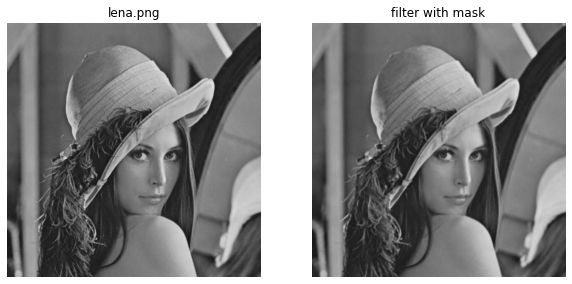

In [6]:
mask = np.array([[1, 2, 1], 
                 [2, 4, 2], 
                 [1, 2, 1]])
print('Mask:')
print(mask)

I = cv2.imread('lena.png')

kernel = mask / np.sum(mask)
_I = cv2.filter2D(I, -1, kernel)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(I), ax[0].set_title('lena.png')
ax[1].imshow(_I), ax[1].set_title('filter with mask')
for i in range(2):
    ax[i].axis('off')
plt.show()

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe`` wpływa na ''kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [7]:
def fgaussian(size, sigma):
    m = n = size
    h, k = m//2, n//2
    x, y = np.mgrid[-h:h+1, -k:k+1]
    g = np.exp(-(x**2 + y**2)/(2*sigma**2))
    return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()

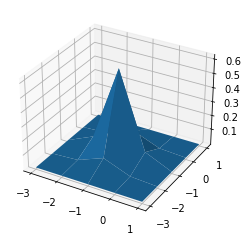

In [8]:
mesh(fgaussian(size=5, sigma=0.5), size=5)

In [9]:
def compare_fgaussain_and_gaussianblur(img: str, size=5, sigma=0.5):
    print('Mask size:', size)
    print('Sigma:', sigma)
    
    I = cv2.imread(img)
    kernel = fgaussian(size, sigma)
    I1 = cv2.filter2D(I, -1, kernel)
    I2 = cv2.GaussianBlur(I, ksize=(size,size), sigmaX=sigma)
    
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].imshow(I), ax[0].set_title(img)
    ax[1].imshow(I1), ax[1].set_title('after fgaussain')
    ax[2].imshow(I2), ax[2].set_title('after GaussianBlur')
    for i in  range(3):
        ax[i].axis('off')
    
    plt.show()

Mask size: 5
Sigma: 0.5


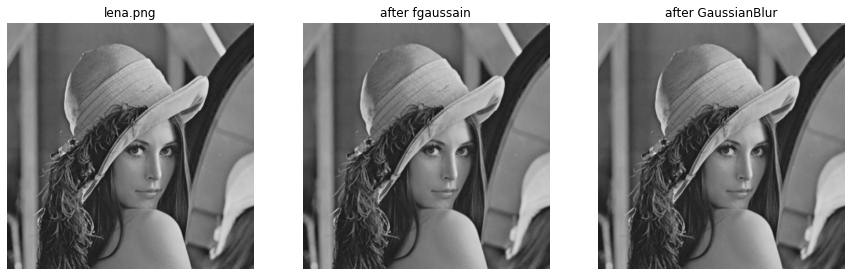

In [10]:
compare_fgaussain_and_gaussianblur('lena.png', size=5, sigma=0.5)

Mask size: 5
Sigma: 0.1


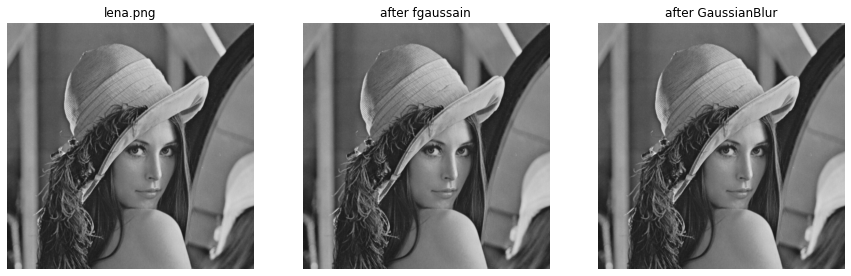

In [11]:
compare_fgaussain_and_gaussianblur('lena.png', size=5, sigma=0.1)

Mask size: 5
Sigma: 10


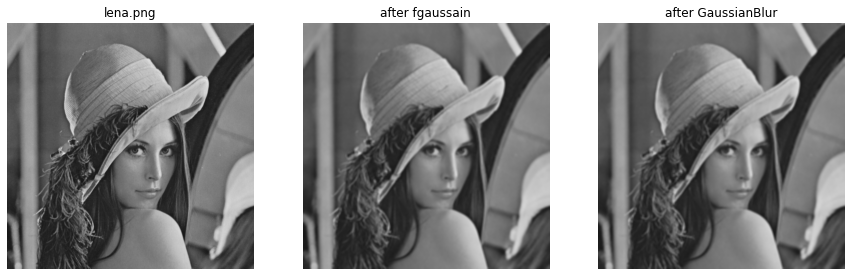

In [12]:
compare_fgaussain_and_gaussianblur('lena.png', size=5, sigma=10)

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


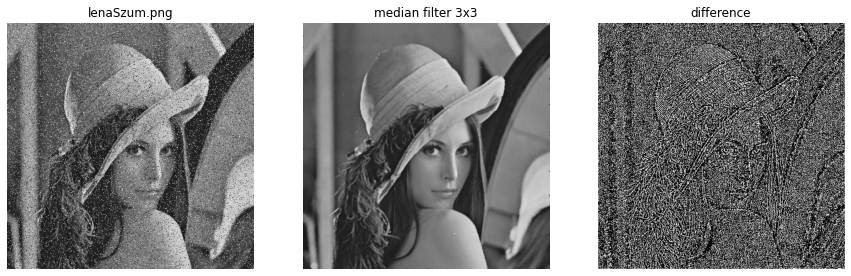

In [13]:
I = cv2.imread('lenaSzum.png', cv2.IMREAD_GRAYSCALE)
_I = signal.medfilt2d(I, kernel_size=3)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(I, 'gray'), ax[0].set_title('lenaSzum.png')
ax[1].imshow(_I, 'gray'), ax[1].set_title('median filter 3x3')
ax[2].imshow(abs(_I-I), 'gray'), ax[2].set_title('difference')
for i in range(3):
    ax[i].axis('off')
plt.show()

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

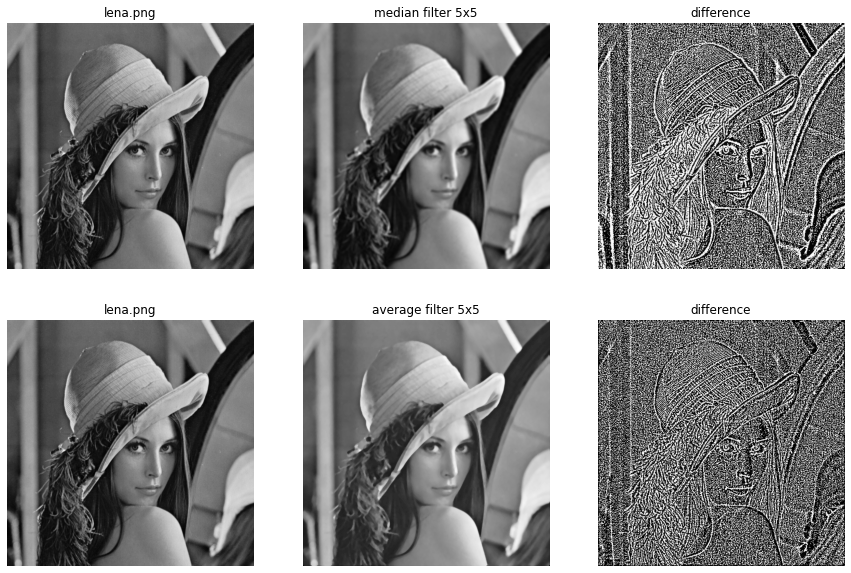

In [14]:
I = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
kernel = np.ones((5,5))/25
I1 = cv2.filter2D(I, -1, kernel)
I2 = signal.medfilt2d(I, kernel_size=5)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))
ax[0][0].imshow(I, 'gray'), ax[0][0].set_title('lena.png')
ax[0][1].imshow(I1, 'gray'), ax[0][1].set_title('median filter 5x5')
ax[0][2].imshow(abs(I-I1), 'gray'), ax[0][2].set_title('difference')
ax[1][0].imshow(I, 'gray'), ax[1][0].set_title('lena.png')
ax[1][1].imshow(I2, 'gray'), ax[1][1].set_title('average filter 5x5')
ax[1][2].imshow(abs(I-I2), 'gray'), ax[1][2].set_title('difference')
for i in range(6):
    ax[i//3][i%3].axis('off')
plt.show()

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x``,''+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x`` i mediana z ''+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

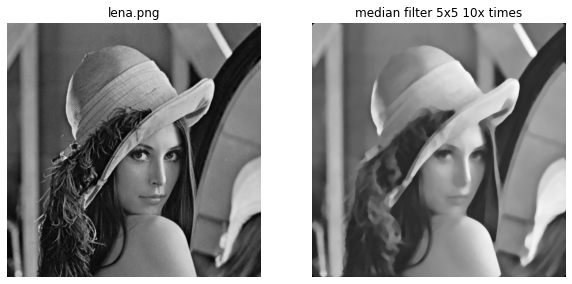

In [15]:
I = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
_I = signal.medfilt2d(I, kernel_size=5)
for i in range(9):
    _I = signal.medfilt2d(_I, kernel_size=5)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(I, 'gray'), ax[0].set_title('lena.png')
ax[1].imshow(_I, 'gray'), ax[1].set_title('median filter 5x5 10x times')
for i in range(2):
    ax[i].axis('off')

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`cv2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

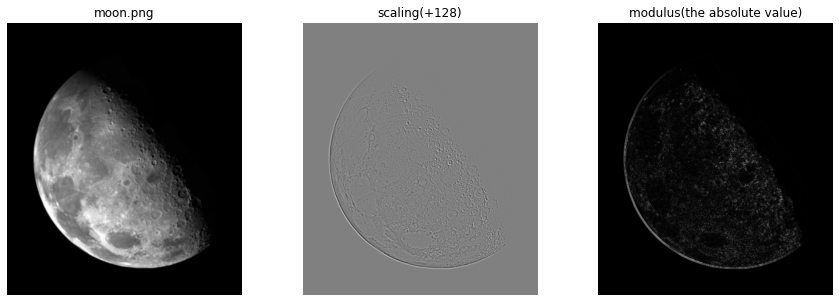

In [16]:
I = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)
I = I.astype('int16')
M = np.array([[0, 1,0],
              [1,-4,1],
              [0, 1,0]])

kernel = M
_I = cv2.filter2D(I, -1, kernel)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(I, 'gray', vmin=0, vmax=256), ax[0].set_title('moon.png')
ax[1].imshow(_I + 128, 'gray', vmin=0, vmax=256), ax[1].set_title('scaling(+128)')
ax[2].imshow(np.abs(_I)*2, 'gray', vmin=0, vmax=256), ax[2].set_title('modulus(the absolute value)')
for i in range(3):
    ax[i].axis('off')
plt.show()

5. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



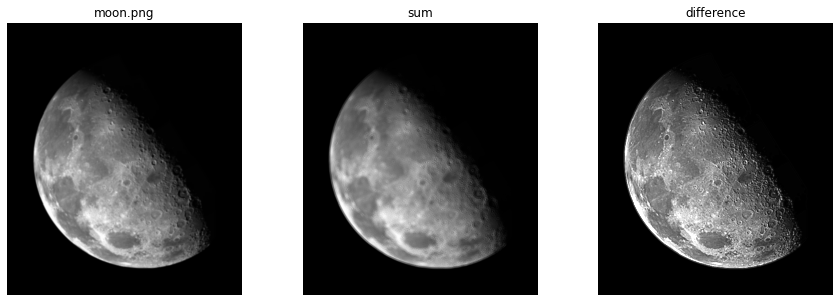

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(I, 'gray', vmin=0, vmax=256), ax[0].set_title('moon.png')
ax[1].imshow((I+_I), 'gray', vmin=0, vmax=256), ax[1].set_title('sum')
ax[2].imshow(np.abs(I-_I*2), 'gray', vmin=0, vmax=256), ax[2].set_title('difference')
for i in range(3):
    ax[i].axis('off')
plt.show()

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [18]:
def image_with_gradients(img: str, grad):
    I = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)
    I = I.astype('int16')

    print('Gradient:')
    print(grad)
    
    _I = cv2.filter2D(I, -1, kernel=grad)
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(I, 'gray', vmin=0, vmax=256), ax[0].set_title('kw.png')
    ax[1].imshow(_I + 128, 'gray', vmin=0, vmax=256), ax[1].set_title('scaling(+128)')
    ax[2].imshow(np.abs(_I), 'gray', vmin=0, vmax=256), ax[2].set_title('modulus(the absolute value)')
    for i in range(3):
        ax[i].axis('off')
    plt.show()

Gradient:
[[ 0  0  0]
 [-1  0  0]
 [ 0  1  0]]


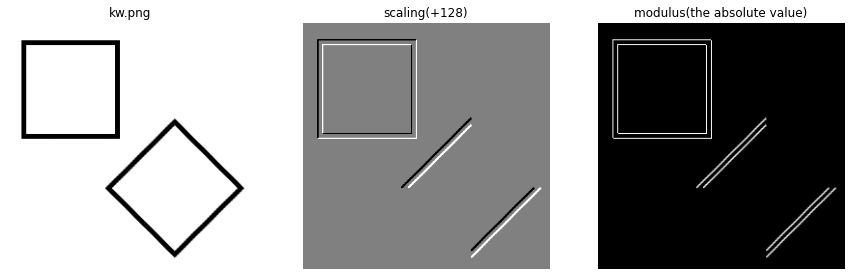

In [19]:
R1 = np.array([[ 0,0,0],
               [-1,0,0],
               [ 0,1,0]]) 
image_with_gradients('kw.png', R1)

Gradient:
[[ 0  0  0]
 [ 0  0 -1]
 [ 0  1  0]]


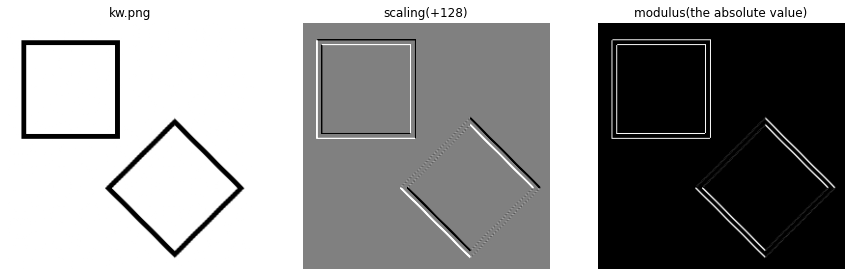

In [20]:
R2 = np.array([[0,0, 0],
               [0,0,-1],
               [0,1, 0]])
image_with_gradients('kw.png', R2)

Gradient:
[[-1  0  1]
 [-1  0  1]
 [-1  0  1]]


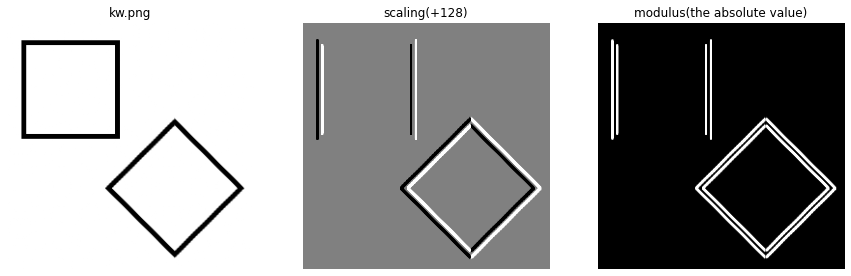

In [21]:
P1 = np.array([[-1,0,1],
               [-1,0,1],
               [-1,0,1]])
image_with_gradients('kw.png', P1)

Gradient:
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


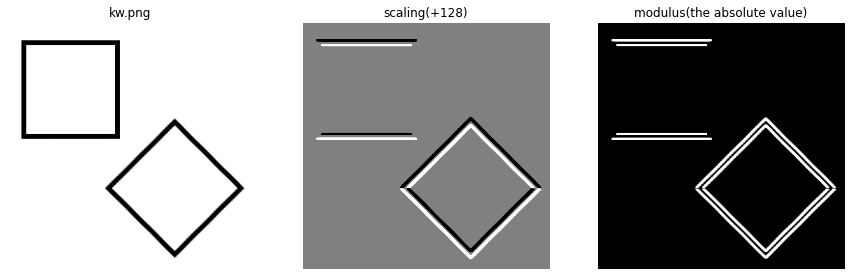

In [22]:
P1 = np.array([[-1,-1,-1],
               [ 0, 0, 0],
               [ 1, 1, 1]])
image_with_gradients('kw.png', P1)

Gradient:
[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


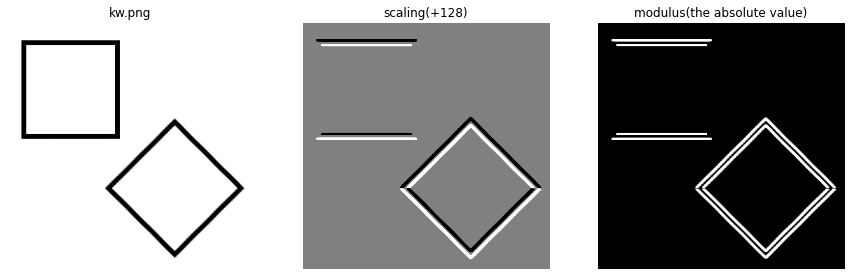

In [23]:
S1 = np.array([[-1,0,1],
               [-2,0,2],
               [-1,0,1]])
image_with_gradients('kw.png', P1)

Gradient:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]


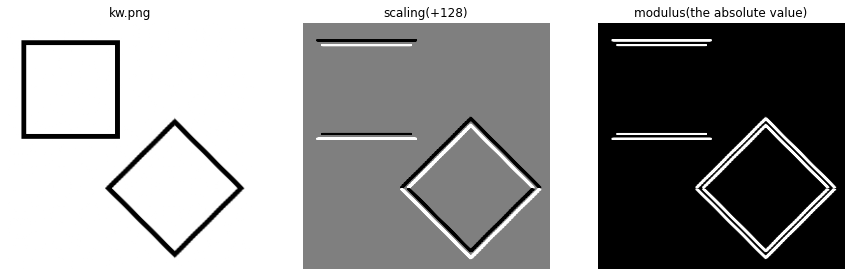

In [24]:
S2 = np.array([[-1,-2,-1],
               [ 0, 0, 0],
               [ 1, 2, 1]])
image_with_gradients('kw.png', S2)

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



In [25]:
def combined_sobel_sqrt(img: str):
    I = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    (Y, X) = I.shape
    OW = np.zeros((Y,X))
    _I_with_borders = np.pad(I, pad_width=1, mode='reflect')
    
    for y in range(1,Y+1):
        for x in range(1, X+1):
            mask1 = np.sum(_I_with_borders[y-1:y+2, x-1:x+2] * S1)
            mask2 = np.sum(_I_with_borders[y-1:y+2, x-1:x+2] * S2)
            OW[y-1, x-1] = (np.sqrt(mask1**2 + mask2**2))
            
    _OW = cv2.normalize(OW, None, 0, 256, cv2.NORM_MINMAX)
    return np.abs(_OW-255)

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

In [26]:
def combined_sobel_modulus(img: str):
    I = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    (Y, X) = I.shape
    OW = np.zeros((Y,X))
    _I_with_borders = np.pad(I, pad_width=1, mode='reflect')
    
    for y in range(1,Y+1):
        for x in range(1, X+1):
            mask1 = np.sum(_I_with_borders[y-1:y+2, x-1:x+2] * S1)
            mask2 = np.sum(_I_with_borders[y-1:y+2, x-1:x+2] * S2)
            OW[y-1, x-1] = np.abs(mask1) + np.abs(mask2)
            
    _OW = cv2.normalize(OW, None, 0, 256, cv2.NORM_MINMAX)
    return np.abs(_OW-255)

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

Combined Sobel filters:


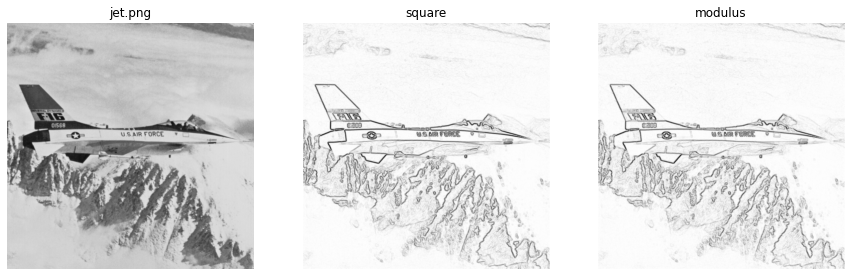

In [27]:
I = cv2.imread('jet.png')
I1 = combined_sobel_sqrt('jet.png')
I2 = combined_sobel_modulus('jet.png')
print('Combined Sobel filters:')
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(I, 'gray', vmin=0, vmax=256), ax[0].set_title('jet.png')
ax[1].imshow(I1, 'gray', vmin=0, vmax=256), ax[1].set_title('square')
ax[2].imshow(I2, 'gray', vmin=0, vmax=256), ax[2].set_title('modulus')
for i in range(3):
    ax[i].axis('off')
plt.show()